The purpose of this project is to demonstrate the use of the PuLP library to help solve optimzation problems in operations research.

In [1]:
# Importing necessary packages
from pulp import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem Description

Hint: This problem can be done with less than 150 variables and less than 110 constraints.

NU Industries operates two manufacturing plants that produce three products: Widgets, Gadgets, and Flugels. The finished products are shipped to the Distribution Center for final distribution to the customers. Five periods of production are to be scheduled.

According to the Sales Department, the production requirements that must be met due to contracts during the planning horizon are as follows:

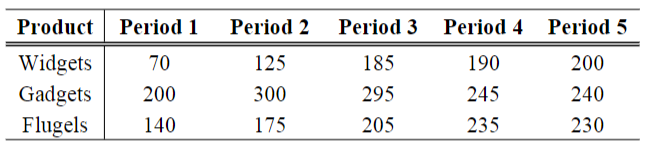

Also, the Marketing & Forecasting Department anticipates that NU Industries can cultivate additional demand within the distribution area through effective advertising. The M&F Department projects that each \\$160 invested in advertising Widgets in a particular period creates additional demand for one Widget in the next period. The corresponding values for Gadgets and Flugels are \\$120 and \\$180, respectively. However, the total advertising budget is limited to \\$70,000 for the entire planning horizon.

Throughout the planning horizon, NU Industries will sell Widgets for \\$2490, Gadgets for $1990, and Flugels for \\$2970. The products can be manufactured at either of NU's Manufacturing Plants.

The Engineering Department has provided the following manufacturing and inventory data.

### Plant A

The production requirements at Plant A are summarized below.

* Each Widget requires 194 pounds of Raw Material 1, 8.6 pounds of Raw Material 2, and 9.5 hours of Labor.
* Each Gadget requires 230 pounds of Raw Material 1 and 7.1 hours of Labor.
* Each Flugel requires 178 pounds of Raw Material 1, 11.6 pounds of Raw Material 2, and 11.1 hours of Labor.


Regular time labor availability is limited to 2500 hours in each period, but overtime can be scheduled in any amount if necessary. Labor costs during periods 1 and 2 are \\$11/hour for regular time and $16.50/hour for overtime. Labor costs are expected to rise by 5% at the end of period 2.

The product inventory area can store a combined maximum of 70 units, and inventory costs are as follows. It costs \\$7.50 to store one Widget from one period to the next. The corresponding costs for Gadgets and Flugels are \\$5.50 and \\$6.50, respectively.

### Plant B

The production requirements at Plant B are summarized below.  Plant B is the more modern of the two facilities and is able to produce the products in a slightly more efficient manner.

* Each Widget requires 188 pounds of Raw Material 1, 9.2 pounds of Raw Material 2, and 9.1 hours of Labor.
* Each Gadget requires 225 pounds of Raw Material 1 and 7.8 hours of Labor.
* Each Flugel requires 170 pounds of Raw Material 1, 10.8 pounds of Raw Material 2, and 10.6 hours of Labor.

Regular time labor availability is limited to 3800 hours in each period, but overtime can be scheduled in any amount if necessary. Labor costs during periods 1 and 2 are \\$11/hour for regular time and \\$16.50/hour for overtime. Labor costs are expected to rise by 10% at the end of period 2.

The product inventory area can store a combined maximum of 50 units, and inventory costs are as follows. It costs \\$7.80 to store one Widget from one period to the next. The corresponding costs for Gadgets and Flugels are \\$5.70 and \\$7.00, respectively.

### Raw Material

A maximum of 70 tons of Raw Material 1 and 2.5 tons of Raw Material 2 are available from a raw material vendor each period. Because of the proximity of the vendor to the plants, Raw Material 1 delivered to Plant A costs \\$1.25/pound and Raw Material 2 delivered to Plant A costs \\$2.65/pound. The corresponding costs for Plant B are \\$1.45/pound for Raw Material 1 and \\$2.90/pound for Raw Material 2. Each plant only purchases raw material that can be used within a given period, since storage areas are limited.  (Note, 1 ton = 2000 pounds)

### Transportation Costs

There is an average transportation cost associated with the shipment of each unit of finished product from each plant to the Distribution Center. The cost depends on the product and the plant of origin. The unit shipping costs are given in the following table.

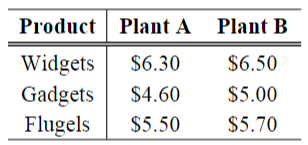

Demand in a given period must be satisfied by utilizing the units produced in that period or by using inventory from a previous period. The problem is to determine the marketing, production, distribution, inventory strategy that maximizes profit. Assume that there is no inventory at the start of the first period and there should be no inventory at the end of the planning horizon. All other plant overhead is assumed to be constant and can be ignored for this analysis. Also, ignore integer restrictions; that is, assume that fractional units can be manufactured, stored, etc. (For reporting purposes, you can round everything off to the nearest tenth.)

### Problem

Once solving for the baseline case.  Do a complete sensitivity analysis, and make business recommendations.  For example, if you could increase advertising budget – how much?  Which raw material do you need more of?  Recreate these scenarios and provide profit considerations.Also, if you solved this problem as an integer problem, how much does that differ your recommendations (above).

### Variables

In [2]:
# Variables

# Product production - Plant A

widg_plantA_per1 = LpVariable("widg_plantA_per1", 0, None)
gadg_plantA_per1 = LpVariable("gadg_plantA_per1", 0, None)
flug_plantA_per1 = LpVariable("flug_plantA_per1", 0, None)

widg_plantA_per2 = LpVariable("widg_plantA_per2", 0, None)
gadg_plantA_per2 = LpVariable("gadg_plantA_per2", 0, None)
flug_plantA_per2 = LpVariable("flug_plantA_per2", 0, None)

widg_plantA_per3 = LpVariable("widg_plantA_per3", 0, None)
gadg_plantA_per3 = LpVariable("gadg_plantA_per3", 0, None)
flug_plantA_per3 = LpVariable("flug_plantA_per3", 0, None)

widg_plantA_per4 = LpVariable("widg_plantA_per4", 0, None)
gadg_plantA_per4 = LpVariable("gadg_plantA_per4", 0, None)
flug_plantA_per4 = LpVariable("flug_plantA_per4", 0, None)

widg_plantA_per5 = LpVariable("widg_plantA_per5", 0, None)
gadg_plantA_per5 = LpVariable("gadg_plantA_per5", 0, None)
flug_plantA_per5 = LpVariable("flug_plantA_per5", 0, None)

# Product production - Plant B

widg_plantB_per1 = LpVariable("widg_plantB_per1", 0, None)
gadg_plantB_per1 = LpVariable("gadg_plantB_per1", 0, None)
flug_plantB_per1 = LpVariable("flug_plantB_per1", 0, None)

widg_plantB_per2 = LpVariable("widg_plantB_per2", 0, None)
gadg_plantB_per2 = LpVariable("gadg_plantB_per2", 0, None)
flug_plantB_per2 = LpVariable("flug_plantB_per2", 0, None)

widg_plantB_per3 = LpVariable("widg_plantB_per3", 0, None)
gadg_plantB_per3 = LpVariable("gadg_plantB_per3", 0, None)
flug_plantB_per3 = LpVariable("flug_plantB_per3", 0, None)

widg_plantB_per4 = LpVariable("widg_plantB_per4", 0, None)
gadg_plantB_per4 = LpVariable("gadg_plantB_per4", 0, None)
flug_plantB_per4 = LpVariable("flug_plantB_per4", 0, None)

widg_plantB_per5 = LpVariable("widg_plantB_per5", 0, None)
gadg_plantB_per5 = LpVariable("gadg_plantB_per5", 0, None)
flug_plantB_per5 = LpVariable("flug_plantB_per5", 0, None)

# Ad Generated Demand - Plant A

widg_per2_ad_plantA = LpVariable("widg_per2_ad_plantA", 0, None)
widg_per3_ad_plantA = LpVariable("widg_per3_ad_plantA", 0, None)
widg_per4_ad_plantA = LpVariable("widg_per4_ad_plantA", 0, None)
widg_per5_ad_plantA = LpVariable("widg_per5_ad_plantA", 0, None)

gadg_per2_ad_plantA = LpVariable("gadg_per2_ad_plantA", 0, None)
gadg_per3_ad_plantA = LpVariable("gadg_per3_ad_plantA", 0, None)
gadg_per4_ad_plantA = LpVariable("gadg_per4_ad_plantA", 0, None)
gadg_per5_ad_plantA = LpVariable("gadg_per5_ad_plantA", 0, None)

flug_per2_ad_plantA = LpVariable("flug_per2_ad_plantA", 0, None)
flug_per3_ad_plantA = LpVariable("flug_per3_ad_plantA", 0, None)
flug_per4_ad_plantA = LpVariable("flug_per4_ad_plantA", 0, None)
flug_per5_ad_plantA = LpVariable("flug_per5_ad_plantA", 0, None)

# Ad Generated Demand - Plant B

widg_per2_ad_plantB = LpVariable("widg_per2_ad_plantB", 0, None)
widg_per3_ad_plantB = LpVariable("widg_per3_ad_plantB", 0, None)
widg_per4_ad_plantB = LpVariable("widg_per4_ad_plantB", 0, None)
widg_per5_ad_plantB = LpVariable("widg_per5_ad_plantB", 0, None)

gadg_per2_ad_plantB = LpVariable("gadg_per2_ad_plantB", 0, None)
gadg_per3_ad_plantB = LpVariable("gadg_per3_ad_plantB", 0, None)
gadg_per4_ad_plantB = LpVariable("gadg_per4_ad_plantB", 0, None)
gadg_per5_ad_plantB = LpVariable("gadg_per5_ad_plantB", 0, None)

flug_per2_ad_plantB = LpVariable("flug_per2_ad_plantB", 0, None)
flug_per3_ad_plantB = LpVariable("flug_per3_ad_plantB", 0, None)
flug_per4_ad_plantB = LpVariable("flug_per4_ad_plantB", 0, None)
flug_per5_ad_plantB = LpVariable("flug_per5_ad_plantB", 0, None)

# Inventory - Plant A

widg_inv_plantA_per1 = LpVariable("widg_inv_plantA_per1", 0, None)
widg_inv_plantA_per2 = LpVariable("widg_inv_plantA_per2", 0, None)
widg_inv_plantA_per3 = LpVariable("widg_inv_plantA_per3", 0, None)
widg_inv_plantA_per4 = LpVariable("widg_inv_plantA_per4", 0, None)

gadg_inv_plantA_per1 = LpVariable("gadg_inv_plantA_per1", 0, None)
gadg_inv_plantA_per2 = LpVariable("gadg_inv_plantA_per2", 0, None)
gadg_inv_plantA_per3 = LpVariable("gadg_inv_plantA_per3", 0, None)
gadg_inv_plantA_per4 = LpVariable("gadg_inv_plantA_per4", 0, None)

flug_inv_plantA_per1 = LpVariable("flug_inv_plantA_per1", 0, None)
flug_inv_plantA_per2 = LpVariable("flug_inv_plantA_per2", 0, None)
flug_inv_plantA_per3 = LpVariable("flug_inv_plantA_per3", 0, None)
flug_inv_plantA_per4 = LpVariable("flug_inv_plantA_per4", 0, None)

# Inventory - Plant B

widg_inv_plantB_per1 = LpVariable("widg_inv_plantB_per1", 0, None)
widg_inv_plantB_per2 = LpVariable("widg_inv_plantB_per2", 0, None)
widg_inv_plantB_per3 = LpVariable("widg_inv_plantB_per3", 0, None)
widg_inv_plantB_per4 = LpVariable("widg_inv_plantB_per4", 0, None)

gadg_inv_plantB_per1 = LpVariable("gadg_inv_plantB_per1", 0, None)
gadg_inv_plantB_per2 = LpVariable("gadg_inv_plantB_per2", 0, None)
gadg_inv_plantB_per3 = LpVariable("gadg_inv_plantB_per3", 0, None)
gadg_inv_plantB_per4 = LpVariable("gadg_inv_plantB_per4", 0, None)

flug_inv_plantB_per1 = LpVariable("flug_inv_plantB_per1", 0, None)
flug_inv_plantB_per2 = LpVariable("flug_inv_plantB_per2", 0, None)
flug_inv_plantB_per3 = LpVariable("flug_inv_plantB_per3", 0, None)
flug_inv_plantB_per4 = LpVariable("flug_inv_plantB_per4", 0, None)

# Regular Hours - Plant A

reghrs_plantA_per1 = LpVariable("reghrs_plantA_per1", 0, None)
reghrs_plantA_per2 = LpVariable("reghrs_plantA_per2", 0, None)
reghrs_plantA_per3 = LpVariable("reghrs_plantA_per3", 0, None)
reghrs_plantA_per4 = LpVariable("reghrs_plantA_per4", 0, None)
reghrs_plantA_per5 = LpVariable("reghrs_plantA_per5", 0, None)

# Regular Hours - Plant B

reghrs_plantB_per1 = LpVariable("reghrs_plantB_per1", 0, None)
reghrs_plantB_per2 = LpVariable("reghrs_plantB_per2", 0, None)
reghrs_plantB_per3 = LpVariable("reghrs_plantB_per3", 0, None)
reghrs_plantB_per4 = LpVariable("reghrs_plantB_per4", 0, None)
reghrs_plantB_per5 = LpVariable("reghrs_plantB_per5", 0, None)

# Overtime Hours - Plant A

overtime_plantA_per1 = LpVariable("overtime_plantA_per1", 0, None)
overtime_plantA_per2 = LpVariable("overtime_plantA_per2", 0, None)
overtime_plantA_per3 = LpVariable("overtime_plantA_per3", 0, None)
overtime_plantA_per4 = LpVariable("overtime_plantA_per4", 0, None)
overtime_plantA_per5 = LpVariable("overtime_plantA_per5", 0, None)

# Overtime Hours - Plant B

overtime_plantB_per1 = LpVariable("overtime_plantB_per1", 0, None)
overtime_plantB_per2 = LpVariable("overtime_plantB_per2", 0, None)
overtime_plantB_per3 = LpVariable("overtime_plantB_per3", 0, None)
overtime_plantB_per4 = LpVariable("overtime_plantB_per4", 0, None)
overtime_plantB_per5 = LpVariable("overtime_plantB_per5", 0, None)

### Problem Type

In [3]:
prob = LpProblem("problem", LpMaximize) # goal is to maximize profits

### Constraints

In [4]:
# Constraints

# Demand Constraints

prob += widg_plantA_per1 + widg_plantB_per1 >= 70 # sales department widget period 1 requirement
prob += widg_plantA_per2 + widg_plantB_per2 + (widg_inv_plantA_per1 + widg_inv_plantB_per1) >= 125 # sales department widget period 2 requirement + ad generated demand
prob += widg_plantA_per3 + widg_plantB_per3 + (widg_inv_plantA_per2 + widg_inv_plantB_per2) >= 185 # sales department widget period 3 requirement + ad generated demand
prob += widg_plantA_per4 + widg_plantB_per4 + (widg_inv_plantA_per3 + widg_inv_plantB_per3) >= 190 # sales department widget period 4 requirement + ad generated demand
prob += widg_plantA_per5 + widg_plantB_per5 + (widg_inv_plantA_per4 + widg_inv_plantB_per4) >= 200 # sales department widget period 5 requirement + ad generated demand

prob += gadg_plantA_per1 + gadg_plantB_per1 >= 200 # sales department gadget period 1 requirement
prob += gadg_plantA_per2 + gadg_plantB_per2 + (gadg_inv_plantA_per1 + gadg_inv_plantB_per1) >= 300 # sales department gadget period 2 requirement + ad generated demand
prob += gadg_plantA_per3 + gadg_plantB_per3 + (gadg_inv_plantA_per2 + gadg_inv_plantB_per2) >= 295 # sales department gadget period 3 requirement + ad generated demand
prob += gadg_plantA_per4 + gadg_plantB_per4 + (gadg_inv_plantA_per3 + gadg_inv_plantB_per3) >= 245 # sales department gadget period 4 requirement + ad generated demand
prob += gadg_plantA_per5 + gadg_plantB_per5 + (gadg_inv_plantA_per4 + gadg_inv_plantB_per4) >= 240 # sales department gadget period 5 requirement + ad generated demand

prob += flug_plantA_per1 + flug_plantB_per1 >= 140 # sales department flugel period 1 requirement
prob += flug_plantA_per2 + flug_plantB_per2 + (flug_inv_plantA_per1 + flug_inv_plantB_per1) >= 175 # sales department flugel period 2 requirement + ad generated demand
prob += flug_plantA_per3 + flug_plantB_per3 + (flug_inv_plantA_per2 + flug_inv_plantB_per2) >= 205 # sales department flugel period 3 requirement + ad generated demand
prob += flug_plantA_per4 + flug_plantB_per4 + (flug_inv_plantA_per3 + flug_inv_plantB_per3) >= 235 # sales department flugel period 4 requirement + ad generated demand
prob += flug_plantA_per5 + flug_plantB_per5 + (flug_inv_plantA_per4 + flug_inv_plantB_per4) >= 230 # sales department flugel period 5 requirement + ad generated demand

# Advertising Budget

prob += 160*(widg_per2_ad_plantA + widg_per3_ad_plantA + widg_per4_ad_plantA + widg_per5_ad_plantA + widg_per2_ad_plantB + widg_per3_ad_plantB + widg_per4_ad_plantB + widg_per5_ad_plantB) + 120*(gadg_per2_ad_plantA + gadg_per3_ad_plantA + gadg_per4_ad_plantA + gadg_per5_ad_plantA + gadg_per2_ad_plantB + gadg_per3_ad_plantB + gadg_per4_ad_plantB + gadg_per5_ad_plantB) + 180*(flug_per2_ad_plantA + flug_per3_ad_plantA + flug_per4_ad_plantA + flug_per5_ad_plantA + flug_per2_ad_plantB + flug_per3_ad_plantB + flug_per4_ad_plantB + flug_per5_ad_plantB) <= 70000 # marketing and forecasting department additional demand

# Inventory - Plant A

prob += widg_inv_plantA_per1 + gadg_inv_plantA_per1 + flug_inv_plantA_per1 <= 70 # Per1 Inventory
prob += (widg_inv_plantA_per1 + gadg_inv_plantA_per1 + flug_inv_plantA_per1) + (widg_inv_plantA_per2 + gadg_inv_plantA_per2 + flug_inv_plantA_per2) <= 70 # Per2 Inventory
prob += (widg_inv_plantA_per1 + gadg_inv_plantA_per1 + flug_inv_plantA_per1) + (widg_inv_plantA_per2 + gadg_inv_plantA_per2 + flug_inv_plantA_per2) + (widg_inv_plantA_per3 + gadg_inv_plantA_per3 + flug_inv_plantA_per3) <= 70 # Per3 Inventory
prob += (widg_inv_plantA_per1 + gadg_inv_plantA_per1 + flug_inv_plantA_per1) + (widg_inv_plantA_per2 + gadg_inv_plantA_per2 + flug_inv_plantA_per2) + (widg_inv_plantA_per3 + gadg_inv_plantA_per3 + flug_inv_plantA_per3) + (widg_inv_plantA_per4 + gadg_inv_plantA_per4 + flug_inv_plantA_per4) <= 70 # Per4 Inventory

# Inventory - Plant B

prob += widg_inv_plantB_per1 + gadg_inv_plantB_per1 + flug_inv_plantB_per1 <= 50 # Per1 Inventory
prob += (widg_inv_plantB_per1 + gadg_inv_plantB_per1 + flug_inv_plantB_per1) + (widg_inv_plantB_per2 + gadg_inv_plantB_per2 + flug_inv_plantB_per2) <= 50 # Per2 Inventory
prob += (widg_inv_plantB_per1 + gadg_inv_plantB_per1 + flug_inv_plantB_per1) + (widg_inv_plantB_per2 + gadg_inv_plantB_per2 + flug_inv_plantB_per2) + (widg_inv_plantB_per3 + gadg_inv_plantB_per3 + flug_inv_plantB_per3) <= 50 # Per3 Inventory
prob += (widg_inv_plantB_per1 + gadg_inv_plantB_per1 + flug_inv_plantB_per1) + (widg_inv_plantB_per2 + gadg_inv_plantB_per2 + flug_inv_plantB_per2) + (widg_inv_plantB_per3 + gadg_inv_plantB_per3 + flug_inv_plantB_per3) + (widg_inv_plantB_per4 + gadg_inv_plantB_per4 + flug_inv_plantB_per4) <= 50 # Per4 Inventory

# Labor Hours - Plant A

prob += 9.5*(widg_plantA_per1 + widg_inv_plantA_per1) + 7.1*(gadg_plantA_per1 + gadg_inv_plantA_per1) + 11.1*(flug_plantA_per1 + flug_inv_plantA_per1) - (reghrs_plantA_per1 + overtime_plantA_per1) == 0 # Per1 Labor Hours, converted from 9.5*widg_plantA_per1 + 7.1*gadg_plantA_per1 + 11.1*flug_plantA_per1 = reghrs_plantA_per1 + overtime_plantA_per1
prob += 9.5*(widg_plantA_per2 + widg_per2_ad_plantA + widg_inv_plantA_per2) + 7.1*(gadg_plantA_per2 + gadg_per2_ad_plantA + gadg_inv_plantA_per2) + 11.1*(flug_plantA_per2 + flug_per2_ad_plantA + flug_inv_plantA_per2) - (reghrs_plantA_per2 + overtime_plantA_per2) == 0 # Per2 Labor Hours
prob += 9.5*(widg_plantA_per3 + widg_per3_ad_plantA + widg_inv_plantA_per3) + 7.1*(gadg_plantA_per3 + gadg_per3_ad_plantA + gadg_inv_plantA_per3) + 11.1*(flug_plantA_per3 + flug_per3_ad_plantA + flug_inv_plantA_per3) - (reghrs_plantA_per3 + overtime_plantA_per3) == 0 # Per3 Labor Hours
prob += 9.5*(widg_plantA_per4 + widg_per4_ad_plantA + widg_inv_plantA_per4) + 7.1*(gadg_plantA_per4 + gadg_per4_ad_plantA + gadg_inv_plantA_per4) + 11.1*(flug_plantA_per4 + flug_per4_ad_plantA + flug_inv_plantA_per4) - (reghrs_plantA_per4 + overtime_plantA_per4) == 0 # Per4 Labor Hours
prob += 9.5*(widg_plantA_per5 + widg_per5_ad_plantA) + 7.1*(gadg_plantA_per5 + gadg_per5_ad_plantA) + 11.1*(flug_plantA_per5 + flug_per5_ad_plantA) - (reghrs_plantA_per5 + overtime_plantA_per5) == 0 # Per5 Labor Hours

# Labor Hours - Plant B

prob += 9.5*(widg_plantB_per1 + widg_inv_plantB_per1) + 7.1*(gadg_plantB_per1 + gadg_inv_plantB_per1) + 11.1*(flug_plantB_per1 + flug_inv_plantB_per1) - (reghrs_plantB_per1 + overtime_plantB_per1) == 0 # Per1 Labor Hours
prob += 9.5*(widg_plantB_per2 + widg_per2_ad_plantB + widg_inv_plantB_per2) + 7.1*(gadg_plantB_per2 + gadg_per2_ad_plantB + gadg_inv_plantB_per2) + 11.1*(flug_plantB_per2 + flug_per2_ad_plantB + flug_inv_plantB_per2) - (reghrs_plantB_per2 + overtime_plantB_per2) == 0 # Per2 Labor Hours
prob += 9.5*(widg_plantB_per3 + widg_per3_ad_plantB + widg_inv_plantB_per3) + 7.1*(gadg_plantB_per3 + gadg_per3_ad_plantB + gadg_inv_plantB_per3) + 11.1*(flug_plantB_per3 + flug_per3_ad_plantB + flug_inv_plantB_per3) - (reghrs_plantB_per3 + overtime_plantB_per3) == 0 # Per3 Labor Hours
prob += 9.5*(widg_plantB_per4 + widg_per4_ad_plantB + widg_inv_plantB_per4) + 7.1*(gadg_plantB_per4 + gadg_per4_ad_plantB + gadg_inv_plantB_per4) + 11.1*(flug_plantB_per4 + flug_per4_ad_plantB + flug_inv_plantB_per4) - (reghrs_plantB_per4 + overtime_plantB_per4) == 0 # Per4 Labor Hours
prob += 9.5*(widg_plantB_per5 + widg_per5_ad_plantB) + 7.1*(gadg_plantB_per5 + gadg_per5_ad_plantB) + 11.1*(flug_plantB_per5 + flug_per5_ad_plantB) - (reghrs_plantB_per5 + overtime_plantB_per5) == 0 # Per5 Labor Hours

# Labor Hours Limit - Plant A

prob += reghrs_plantA_per1 <= 2500
prob += reghrs_plantA_per2 <= 2500
prob += reghrs_plantA_per3 <= 2500
prob += reghrs_plantA_per4 <= 2500
prob += reghrs_plantA_per5 <= 2500

# Labor Hours Limit - Plant B

prob += reghrs_plantB_per1 <= 2500
prob += reghrs_plantB_per2 <= 2500
prob += reghrs_plantB_per3 <= 2500
prob += reghrs_plantB_per4 <= 2500
prob += reghrs_plantB_per5 <= 2500

# Raw Material 1 (across both Plants)

prob += (194*(widg_plantA_per1 + widg_inv_plantA_per1) + 230*(gadg_plantA_per1 + gadg_inv_plantA_per1) + 178*(flug_plantA_per1 + flug_inv_plantA_per1) + (188*(widg_plantB_per1 + widg_inv_plantB_per1) + 225*(gadg_plantB_per1 + gadg_inv_plantB_per1) + 170*(flug_plantB_per1 + flug_inv_plantB_per1 + flug_inv_plantB_per1))) <= 140000 # in lbs # Per1 Raw Material 1
prob += (194*(widg_plantA_per2 + widg_per2_ad_plantA + widg_inv_plantA_per2) + 230*(gadg_plantA_per2 + gadg_per2_ad_plantA + gadg_inv_plantA_per2) + 178*(flug_plantA_per2 + flug_per2_ad_plantA + flug_inv_plantA_per2)) + (188*(widg_plantB_per2 + widg_per2_ad_plantB + widg_inv_plantB_per2) + 225*(gadg_plantB_per2 + gadg_per2_ad_plantB + gadg_inv_plantB_per2) + 170*(flug_plantB_per2 + flug_per2_ad_plantB + flug_inv_plantB_per2)) <= 140000 # in lbs # Per2 Raw Material 1
prob += (194*(widg_plantA_per3 + widg_per3_ad_plantA + widg_inv_plantA_per3) + 230*(gadg_plantA_per3 + gadg_per2_ad_plantA + gadg_inv_plantA_per3) + 178*(flug_plantA_per3 + flug_per3_ad_plantA + flug_inv_plantA_per3)) + (188*(widg_plantB_per3 + widg_per3_ad_plantB + widg_inv_plantB_per3) + 225*(gadg_plantB_per3 + gadg_per3_ad_plantB + gadg_inv_plantB_per3) + 170*(flug_plantB_per3 + flug_per3_ad_plantB + flug_inv_plantB_per3)) <= 140000 # in lbs # Per3 Raw Material 1
prob += (194*(widg_plantA_per4 + widg_per4_ad_plantA + widg_inv_plantA_per4) + 230*(gadg_plantA_per4 + gadg_per2_ad_plantA + gadg_inv_plantA_per4) + 178*(flug_plantA_per4 + flug_per4_ad_plantA + flug_inv_plantA_per4)) + (188*(widg_plantB_per4 + widg_per4_ad_plantB + widg_inv_plantB_per4) + 225*(gadg_plantB_per4 + gadg_per4_ad_plantB + gadg_inv_plantB_per4) + 170*(flug_plantB_per4 + flug_per4_ad_plantB + flug_inv_plantB_per4)) <= 140000 # in lbs # Per4 Raw Material 1
prob += (194*(widg_plantA_per5 + widg_per5_ad_plantA) + 230*(gadg_plantA_per5 + gadg_per2_ad_plantA) + 178*(flug_plantA_per5 + flug_per5_ad_plantA)) + (188*(widg_plantB_per5 + widg_per5_ad_plantB) + 225*(gadg_plantB_per5 + gadg_per5_ad_plantB) + 170*(flug_plantB_per5 + flug_per5_ad_plantB)) <= 140000 # in lbs # Per5 Raw Material 1

# Raw Material 2 (across both Plants)

prob += (8.6*(widg_plantA_per1 + widg_inv_plantA_per1) + 11.6*(flug_plantA_per1 + flug_inv_plantA_per1)) + (9.2*(widg_plantB_per1 + widg_inv_plantB_per1) + 10.8*(flug_plantB_per1 + flug_inv_plantB_per1)) <= 5000 # in lbs (gadgets do not require raw mat 2) # Per1 Raw Material 2
prob += (8.6*(widg_plantA_per2 + widg_per2_ad_plantA + widg_inv_plantA_per2) + 11.6*(flug_plantA_per2 + flug_per2_ad_plantA + flug_inv_plantA_per2)) + (9.2*(widg_plantB_per2 + widg_per2_ad_plantB + widg_inv_plantB_per2) + 10.8*(flug_plantB_per2 + flug_per2_ad_plantB + flug_inv_plantB_per2)) <= 5000 # in lbs (gadgets do not require raw mat 2) # Per2 Raw Material 2
prob += (8.6*(widg_plantA_per3 + widg_per3_ad_plantA + widg_inv_plantA_per3) + 11.6*(flug_plantA_per3 + flug_per3_ad_plantA + flug_inv_plantA_per3)) + (9.2*(widg_plantB_per3 + widg_per3_ad_plantB + widg_inv_plantB_per3) + 10.8*(flug_plantB_per3 + flug_per3_ad_plantB + flug_inv_plantB_per3)) <= 5000 # in lbs (gadgets do not require raw mat 2) # Per3 Raw Material 2
prob += (8.6*(widg_plantA_per4 + widg_per4_ad_plantA + widg_inv_plantA_per4) + 11.6*(flug_plantA_per4 + flug_per4_ad_plantA + flug_inv_plantA_per4)) + (9.2*(widg_plantB_per4 + widg_per4_ad_plantB + widg_inv_plantB_per4) + 10.8*(flug_plantB_per4 + flug_per4_ad_plantB + flug_inv_plantB_per4)) <= 5000 # in lbs (gadgets do not require raw mat 2) # Per4 Raw Material 2
prob += (8.6*(widg_plantA_per5 + widg_per5_ad_plantA) + 11.6*(flug_plantA_per5 + flug_per5_ad_plantA)) + (9.2*(widg_plantB_per5 + widg_per5_ad_plantB) + 10.8*(flug_plantB_per5 + flug_per5_ad_plantB)) <= 5000 # in lbs (gadgets do not require raw mat 2) # Per5 Raw Material 2

#### Revenue

In [5]:
# Regular Production Revenue
regular_production_revenue = 2490*(widg_plantA_per1 + widg_plantA_per2 + widg_plantA_per3 + widg_plantA_per4 + widg_plantA_per5 + widg_plantB_per1 + widg_plantB_per2 + widg_plantB_per3 + widg_plantB_per4 + widg_plantB_per5) + 1990*(gadg_plantA_per1 + gadg_plantA_per2 + gadg_plantA_per3 + gadg_plantA_per4 + gadg_plantA_per5 + gadg_plantB_per1 + gadg_plantB_per2 + gadg_plantB_per3 + gadg_plantB_per4 + gadg_plantB_per5) + 2970*(flug_plantA_per1 + flug_plantA_per2 + flug_plantA_per3 + flug_plantA_per4 + flug_plantA_per5 + flug_plantB_per1 + flug_plantB_per2 + flug_plantB_per3 + flug_plantB_per4 + flug_plantB_per5)

# Ad-generated Production Revenue
ad_generated_production_revenue = 2490*(widg_per2_ad_plantA + widg_per3_ad_plantA + widg_per4_ad_plantA + widg_per5_ad_plantA + widg_per2_ad_plantB + widg_per3_ad_plantB + widg_per4_ad_plantB + widg_per5_ad_plantB) + 1990*(gadg_per2_ad_plantA + gadg_per3_ad_plantA + gadg_per4_ad_plantA + gadg_per5_ad_plantA + gadg_per2_ad_plantB + gadg_per3_ad_plantB + gadg_per4_ad_plantB + gadg_per5_ad_plantB) + 2970*(flug_per2_ad_plantA + flug_per3_ad_plantA + flug_per4_ad_plantA + flug_per5_ad_plantA + flug_per2_ad_plantB + flug_per3_ad_plantB + flug_per4_ad_plantB + flug_per5_ad_plantB)

# Inventory Production Revenue
inventory_production_revenue = 2490*(widg_inv_plantA_per1 + widg_inv_plantA_per2 + widg_inv_plantA_per3 + widg_inv_plantA_per4 + widg_inv_plantB_per1 + widg_inv_plantB_per2 + widg_inv_plantB_per3 + widg_inv_plantB_per4) + 1990*(gadg_inv_plantA_per1 + gadg_inv_plantA_per2 + gadg_inv_plantA_per3 + gadg_inv_plantA_per4 + gadg_inv_plantB_per1 + gadg_inv_plantB_per2 + gadg_inv_plantB_per3 + gadg_inv_plantB_per4) + 2970*(flug_inv_plantA_per1 + flug_inv_plantA_per2 + flug_inv_plantA_per3 + flug_inv_plantA_per4 + flug_inv_plantB_per1 + flug_inv_plantB_per2 + flug_inv_plantB_per3 + flug_inv_plantB_per4)

# Total Revenue
total_revenue = regular_production_revenue + ad_generated_production_revenue + inventory_production_revenue

#### Cost

In [6]:
# Inventory Cost
inventory_cost = (7.5*widg_inv_plantA_per1 + 5.5*gadg_inv_plantA_per1 + 6.5*flug_inv_plantA_per1) + (7.5*(widg_inv_plantA_per1 + widg_inv_plantA_per2) + 5.5*(gadg_inv_plantA_per1 + gadg_inv_plantA_per2) + 6.5*(flug_inv_plantA_per1 + flug_inv_plantA_per2)) + (7.5*(widg_inv_plantA_per1 + widg_inv_plantA_per2 + widg_inv_plantA_per3) + 5.5*(gadg_inv_plantA_per1 + gadg_inv_plantA_per2 + gadg_inv_plantA_per3) + 6.5*(flug_inv_plantA_per1 + flug_inv_plantA_per2 + flug_inv_plantA_per3)) + (7.5*(widg_inv_plantA_per1 + widg_inv_plantA_per2 + widg_inv_plantA_per3 + widg_inv_plantA_per4) + 5.5*(gadg_inv_plantA_per1 + gadg_inv_plantA_per2 + gadg_inv_plantA_per3 + gadg_inv_plantA_per4) + 6.5*(flug_inv_plantA_per1 + flug_inv_plantA_per2 + flug_inv_plantA_per3 + flug_inv_plantA_per4)) + (7.8*widg_inv_plantB_per1 + 5.7*gadg_inv_plantB_per1 + 7*flug_inv_plantB_per1) + (7.8*(widg_inv_plantB_per1 + widg_inv_plantB_per2) + 5.7*(gadg_inv_plantB_per1 + gadg_inv_plantB_per2) + 7*(flug_inv_plantB_per1 + flug_inv_plantB_per2)) + (7.8*(widg_inv_plantB_per1 + widg_inv_plantB_per2 + widg_inv_plantB_per3) + 5.7*(gadg_inv_plantB_per1 + gadg_inv_plantB_per2 + gadg_inv_plantB_per3) + 7*(flug_inv_plantB_per1 + flug_inv_plantB_per2 + flug_inv_plantB_per3)) + (7.8*(widg_inv_plantB_per1 + widg_inv_plantB_per2 + widg_inv_plantB_per3 + widg_inv_plantB_per4) + 5.7*(gadg_inv_plantB_per1 + gadg_inv_plantB_per2 + gadg_inv_plantB_per3 + gadg_inv_plantB_per4) + 7*(flug_inv_plantB_per1 + flug_inv_plantB_per2 + flug_inv_plantB_per3 + flug_inv_plantB_per4))

# Advertising Cost
advertising_cost = (160*(widg_per2_ad_plantA + widg_per3_ad_plantA + widg_per4_ad_plantA + widg_per5_ad_plantA + widg_per2_ad_plantB + widg_per3_ad_plantB + widg_per4_ad_plantB + widg_per5_ad_plantB) + 120*(gadg_per2_ad_plantA + gadg_per3_ad_plantA + gadg_per4_ad_plantA + gadg_per5_ad_plantA + gadg_per2_ad_plantB + gadg_per3_ad_plantB + gadg_per4_ad_plantB + gadg_per5_ad_plantB) + 180*(flug_per2_ad_plantA + flug_per3_ad_plantA + flug_per4_ad_plantA + flug_per5_ad_plantA + flug_per2_ad_plantB + flug_per3_ad_plantB + flug_per4_ad_plantB + flug_per5_ad_plantB))

# Regular Labor Cost
regular_labor_cost = (11 * reghrs_plantA_per1) + (11 * reghrs_plantA_per2) + (11 * 1.05 * reghrs_plantA_per3) + (11 * 1.05 * reghrs_plantA_per4) + (11 * 1.05 * reghrs_plantA_per5) + (11 * reghrs_plantB_per1) + (11 * reghrs_plantB_per2) + (11 * 1.1 * reghrs_plantB_per3) + (11 * 1.1 * reghrs_plantB_per4) + (11 * 1.1 * reghrs_plantB_per5)

# Overtime Labor Cost
ot_labor_cost = (16.5 * overtime_plantA_per1) + (16.5 * overtime_plantA_per2) + (16.5 * 1.05 * overtime_plantA_per3) + (16.5 * 1.05 * overtime_plantA_per4) + (16.5 * 1.05 * overtime_plantA_per5) + (16.5 * overtime_plantB_per1) + (16.5 * overtime_plantB_per2) + (16.5 * 1.1 * overtime_plantB_per3) + (16.5 * 1.1 * overtime_plantB_per4) + (16.5 * 1.1 * overtime_plantB_per5)

# Raw Material Cost
raw_mat_cost = (1.25 * (194*(widg_plantA_per1 + widg_inv_plantA_per1) + 230*(gadg_plantA_per1 + gadg_inv_plantA_per1) + 178*(flug_plantA_per1 + flug_inv_plantA_per1))) + (1.25 * (194*(widg_plantA_per2 + widg_inv_plantA_per2 + widg_per2_ad_plantA) + 230*(gadg_plantA_per2 + gadg_inv_plantA_per2 + gadg_per2_ad_plantA) + 178*(flug_plantA_per2 + flug_inv_plantA_per2 + flug_per2_ad_plantA))) + (1.25 * (194*(widg_plantA_per3 + widg_inv_plantA_per3 + widg_per3_ad_plantA) + 230*(gadg_plantA_per3 + gadg_inv_plantA_per3 + gadg_per3_ad_plantA) + 178*(flug_plantA_per3 + flug_inv_plantA_per3 + flug_per3_ad_plantA))) + (1.25 * (194*(widg_plantA_per4 + widg_inv_plantA_per4 + widg_per4_ad_plantA) + 230*(gadg_plantA_per4 + gadg_inv_plantA_per4 + gadg_per4_ad_plantA) + 178*(flug_plantA_per4 + flug_inv_plantA_per4 + flug_per4_ad_plantA))) + (1.25 * (194*(widg_plantA_per5 + widg_per5_ad_plantA) + 230*(gadg_plantA_per5 + gadg_per5_ad_plantA) + 178*(flug_plantA_per5 + flug_per5_ad_plantA))) + (2.65 * (8.6*(widg_plantA_per1 + widg_inv_plantA_per1) + 11.6*(flug_plantA_per1 + flug_inv_plantA_per1))) + (2.65 * (8.6*(widg_plantA_per2 + widg_inv_plantA_per2 + widg_per2_ad_plantA) + 11.6*(flug_plantA_per2 + flug_inv_plantA_per2 + flug_per2_ad_plantA))) + (2.65 * (8.6*(widg_plantA_per3 + widg_inv_plantA_per3 + widg_per3_ad_plantA) + 11.6*(flug_plantA_per3 + flug_inv_plantA_per3 + flug_per3_ad_plantA))) + (2.65 * (8.6*(widg_plantA_per4 + widg_inv_plantA_per4 + widg_per4_ad_plantA) + 11.6*(flug_plantA_per4 + flug_inv_plantA_per4 + flug_per4_ad_plantA))) + (2.65 * (8.6*(widg_plantA_per5 + widg_per5_ad_plantA) + 11.6*(flug_plantA_per5 + flug_per5_ad_plantA))) + (1.45 * (188*(widg_plantB_per1 + widg_inv_plantB_per1) + 225*(gadg_plantB_per1 + gadg_inv_plantB_per1) + 170*(flug_plantB_per1 + flug_inv_plantB_per1))) + (1.45 * (188*(widg_plantB_per2 + widg_inv_plantB_per2 + widg_per2_ad_plantB) + 225*(gadg_plantB_per2 + gadg_inv_plantB_per2 + gadg_per2_ad_plantB) + 170*(flug_plantB_per2 + flug_inv_plantB_per2 + flug_per2_ad_plantB))) + (1.45 * (188*(widg_plantB_per3 + widg_inv_plantB_per3 + widg_per3_ad_plantB) + 225*(gadg_plantB_per3 + gadg_inv_plantB_per3 + gadg_per3_ad_plantB) + 170*(flug_plantB_per3 + flug_inv_plantB_per3 + flug_per3_ad_plantB))) + (1.45 * (188*(widg_plantB_per4 + widg_inv_plantB_per4 + widg_per4_ad_plantB) + 225*(gadg_plantB_per4 + gadg_inv_plantB_per4 + gadg_per4_ad_plantB) + 170*(flug_plantB_per4 + flug_inv_plantB_per4 + flug_per4_ad_plantB))) + (1.45 * (188*(widg_plantB_per5 + widg_per5_ad_plantB) + 225*(gadg_plantB_per5 + gadg_per5_ad_plantB) + 170*(flug_plantB_per5 + flug_per5_ad_plantB))) + (2.9 * (9.2*(widg_plantB_per1 + widg_inv_plantB_per1) + 10.8*(flug_plantB_per1 + flug_inv_plantB_per1))) + (2.9 * (9.2*(widg_plantB_per2 + widg_inv_plantB_per2 + widg_per2_ad_plantB) + 10.8*(flug_plantB_per2 + flug_inv_plantB_per2 + flug_per2_ad_plantB))) + (2.9 * (9.2*(widg_plantB_per3 + widg_inv_plantB_per3 + widg_per3_ad_plantB) + 10.8*(flug_plantB_per3 + flug_inv_plantB_per3 + flug_per3_ad_plantB))) + (2.9 * (9.2*(widg_plantB_per4 + widg_inv_plantB_per4 + widg_per4_ad_plantB) + 10.8*(flug_plantB_per4 + flug_inv_plantB_per4 + flug_per4_ad_plantB))) + (2.9 * (9.2*(widg_plantB_per5 + widg_per5_ad_plantB) + 10.8*(flug_plantB_per5 + flug_per5_ad_plantB)))

# Transportation Cost
transportation_cost = (6.3 * (widg_plantA_per1 + widg_plantA_per2 + widg_plantA_per3 + widg_plantA_per4 + widg_plantA_per5 + widg_inv_plantA_per1 + widg_inv_plantA_per2 + widg_inv_plantA_per3 + widg_inv_plantA_per4 + widg_per2_ad_plantA + widg_per3_ad_plantA + widg_per4_ad_plantA + widg_per5_ad_plantA)) + (4.6 * (gadg_plantA_per1 + gadg_plantA_per2 + gadg_plantA_per3 + gadg_plantA_per4 + gadg_plantA_per5 + gadg_inv_plantA_per1 + gadg_inv_plantA_per2 + gadg_inv_plantA_per3 + gadg_inv_plantA_per4 + gadg_per2_ad_plantA + gadg_per3_ad_plantA + gadg_per4_ad_plantA + gadg_per5_ad_plantA)) + (5.5 * (flug_plantA_per1 + flug_plantA_per2 + flug_plantA_per3 + flug_plantA_per4 + flug_plantA_per5 + flug_inv_plantA_per1 + flug_inv_plantA_per2 + flug_inv_plantA_per3 + flug_inv_plantA_per4 + flug_per2_ad_plantA + flug_per3_ad_plantA + flug_per4_ad_plantA + flug_per5_ad_plantA)) + (6.5 * (widg_plantB_per1 + widg_plantB_per2 + widg_plantB_per3 + widg_plantB_per4 + widg_plantB_per5 + widg_inv_plantB_per1 + widg_inv_plantB_per2 +widg_inv_plantB_per3 + widg_inv_plantB_per4 + widg_per2_ad_plantB + widg_per3_ad_plantB + widg_per4_ad_plantB + widg_per5_ad_plantB)) + (5 * (gadg_plantB_per1 + gadg_plantB_per2 + gadg_plantB_per3 + gadg_plantB_per4 + gadg_plantB_per5 + gadg_inv_plantB_per1 + gadg_inv_plantB_per2 + gadg_inv_plantB_per3 + gadg_inv_plantB_per4 + gadg_per2_ad_plantB + gadg_per3_ad_plantB + gadg_per4_ad_plantB + gadg_per5_ad_plantB)) + (5.7 * (flug_plantB_per1 + flug_plantB_per2 + flug_plantB_per3 + flug_plantB_per4 + flug_plantB_per5 + flug_inv_plantB_per1 + flug_inv_plantB_per2 + flug_inv_plantB_per3 + flug_inv_plantB_per4 + flug_per2_ad_plantB + flug_per3_ad_plantB + flug_per4_ad_plantB + flug_per5_ad_plantB))

# Total Cost
total_cost = inventory_cost + advertising_cost + regular_labor_cost + ot_labor_cost + raw_mat_cost + transportation_cost

#### Profit

In [7]:
profit = total_revenue - total_cost

### Objective Function (Profit, to maximize)

In [8]:
# Define objective function
prob += profit

## Solve

In [12]:
prob.solve(GLPK(options = ['--ranges base_case_sensitivity_report.sen']))
print("Status:", LpStatus[prob.status])

for variable in prob.variables():
    print(variable.name, "=", round(variable.varValue, 2))
    
print("Objective: $", round(value(prob.objective)))

Status: Optimal
flug_inv_plantA_per1 = 0.0
flug_inv_plantA_per2 = 0.0
flug_inv_plantA_per3 = 0.0
flug_inv_plantA_per4 = 0.0
flug_inv_plantB_per1 = 0.0
flug_inv_plantB_per2 = 0.0
flug_inv_plantB_per3 = 0.0
flug_inv_plantB_per4 = 0.0
flug_per2_ad_plantA = 0.0
flug_per2_ad_plantB = 0.0
flug_per3_ad_plantA = 0.0
flug_per3_ad_plantB = 0.0
flug_per4_ad_plantA = 0.0
flug_per4_ad_plantB = 0.0
flug_per5_ad_plantA = 0.0
flug_per5_ad_plantB = 0.0
flug_plantA_per1 = 0.0
flug_plantA_per2 = 0.0
flug_plantA_per3 = 0.0
flug_plantA_per4 = 0.0
flug_plantA_per5 = 0.0
flug_plantB_per1 = 403.33
flug_plantB_per2 = 351.61
flug_plantB_per3 = 219.82
flug_plantB_per4 = 289.15
flug_plantB_per5 = 279.47
gadg_inv_plantA_per1 = 53.36
gadg_inv_plantA_per2 = 0.0
gadg_inv_plantA_per3 = 0.0
gadg_inv_plantA_per4 = 0.0
gadg_inv_plantB_per1 = 0.0
gadg_inv_plantB_per2 = 0.0
gadg_inv_plantB_per3 = 0.0
gadg_inv_plantB_per4 = 0.0
gadg_per2_ad_plantA = 0.0
gadg_per2_ad_plantB = 0.0
gadg_per3_ad_plantA = 57.11
gadg_per3_ad_plan